## Downloading and Loading API LIST sample data into a local ElasticSearch

- Create an account in https://api.list.co.uk/
- GET an API KEY in https://api.list.co.uk/getting-started

LIST  has two indices: 'events' (https://api.list.co.uk/documentation#api-Events) and 'places' (https://api.list.co.uk/documentation#api-Places

We are going to **download sample data from each index**, and upload them in our local ElastiSearch. 
Furthermore, some sample queries to API LIST will be also shown at the end of this notebook!

### Download EVENTS


The following command only downloads **20 events** and it stores them into 'events.json' file.

- Replaced film.wikipedia.image by film.wikipedia_image 
- Replaced film.certificate.bbfc by film.certificate_bbfc



In [ ]:
!curl -H "Authorization: Bearer <API_KEY>" -X GET "https://api.list.co.uk/v1/events" > events.json

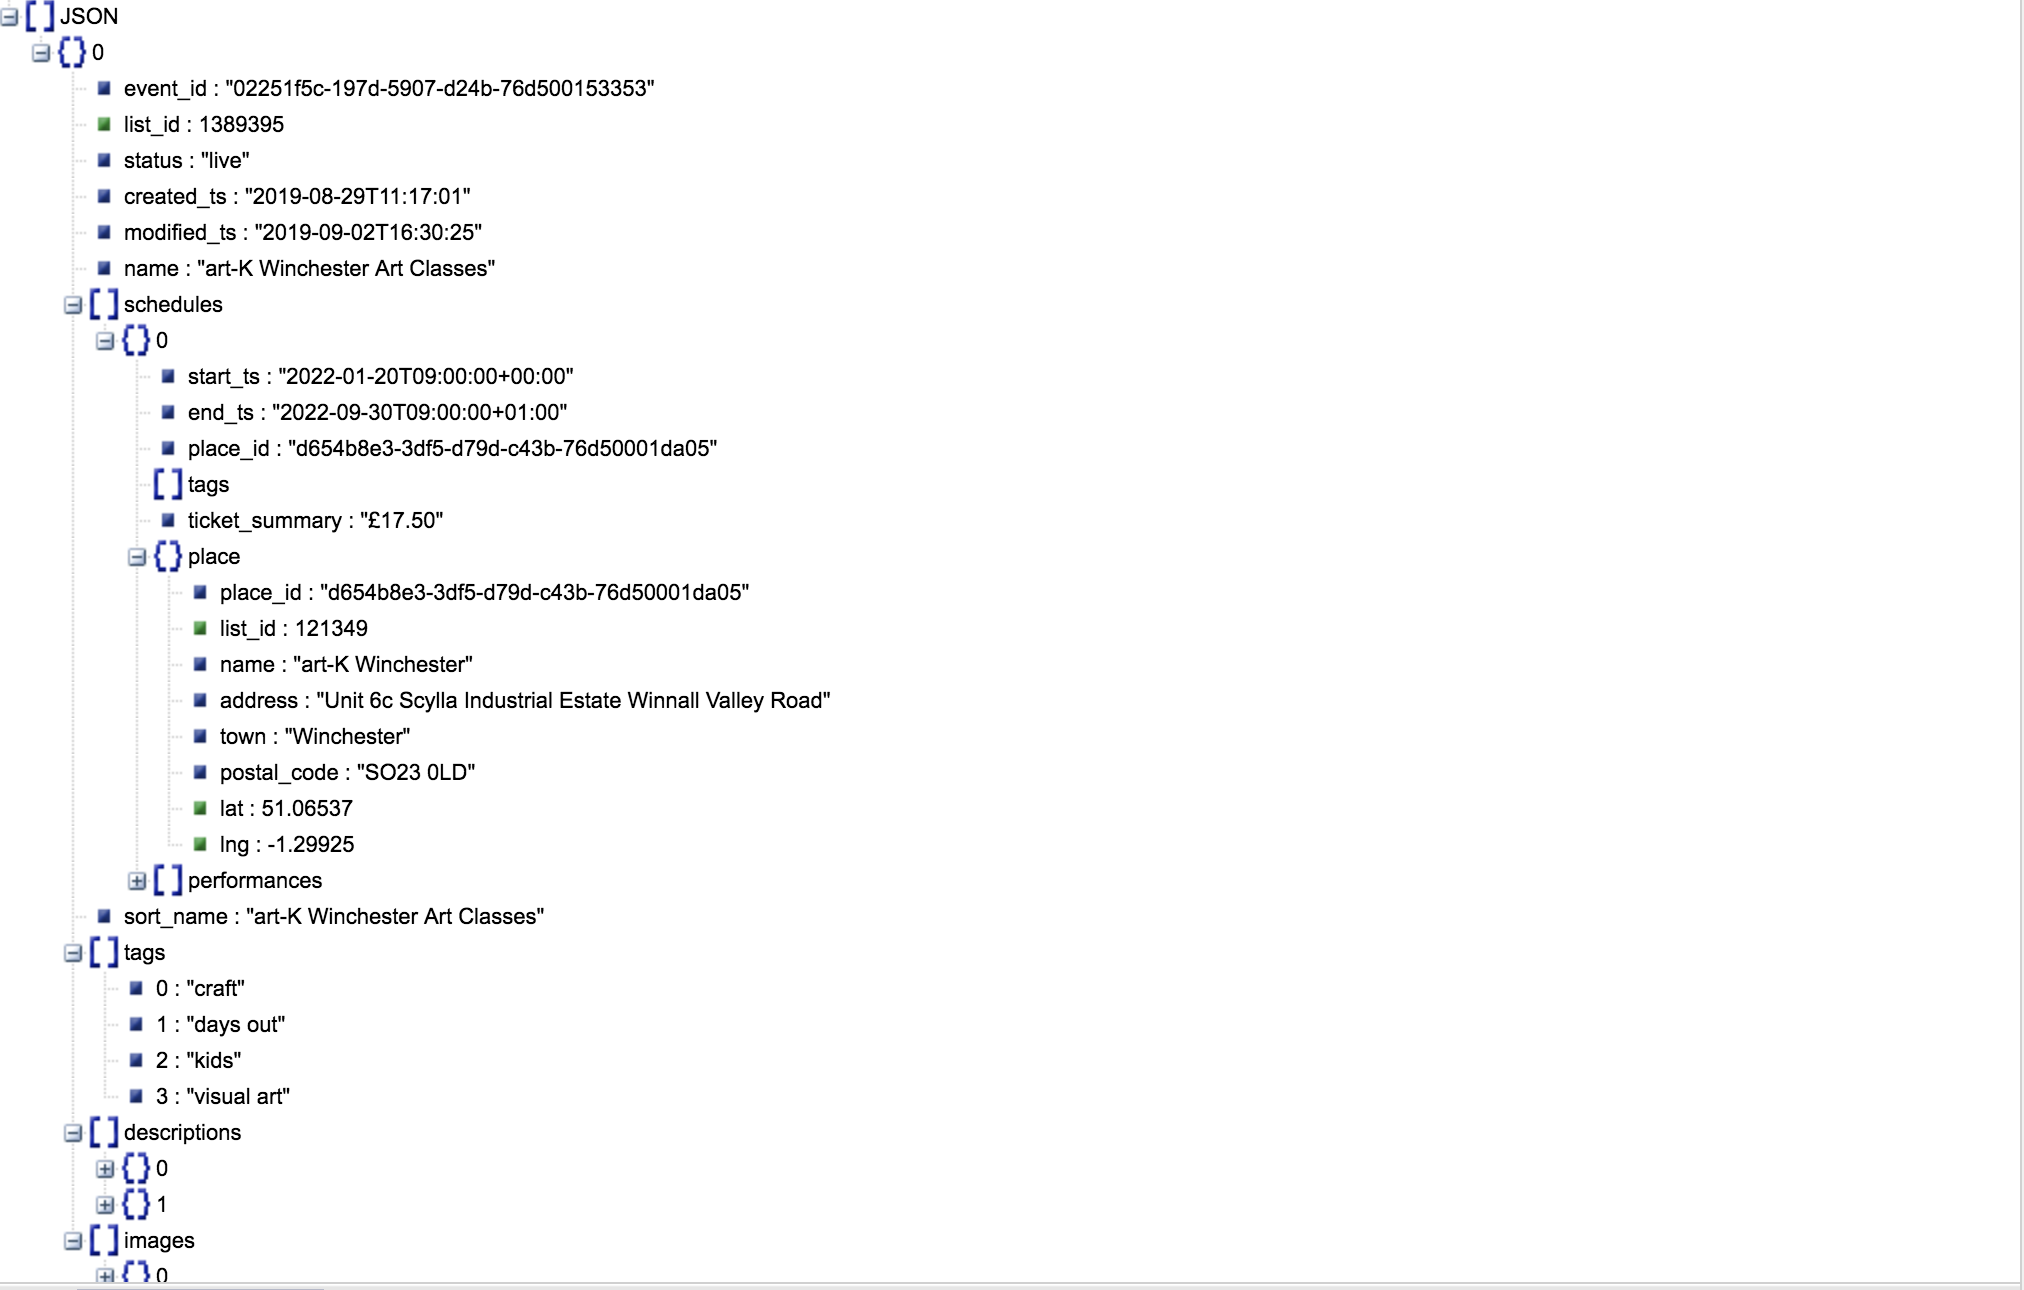

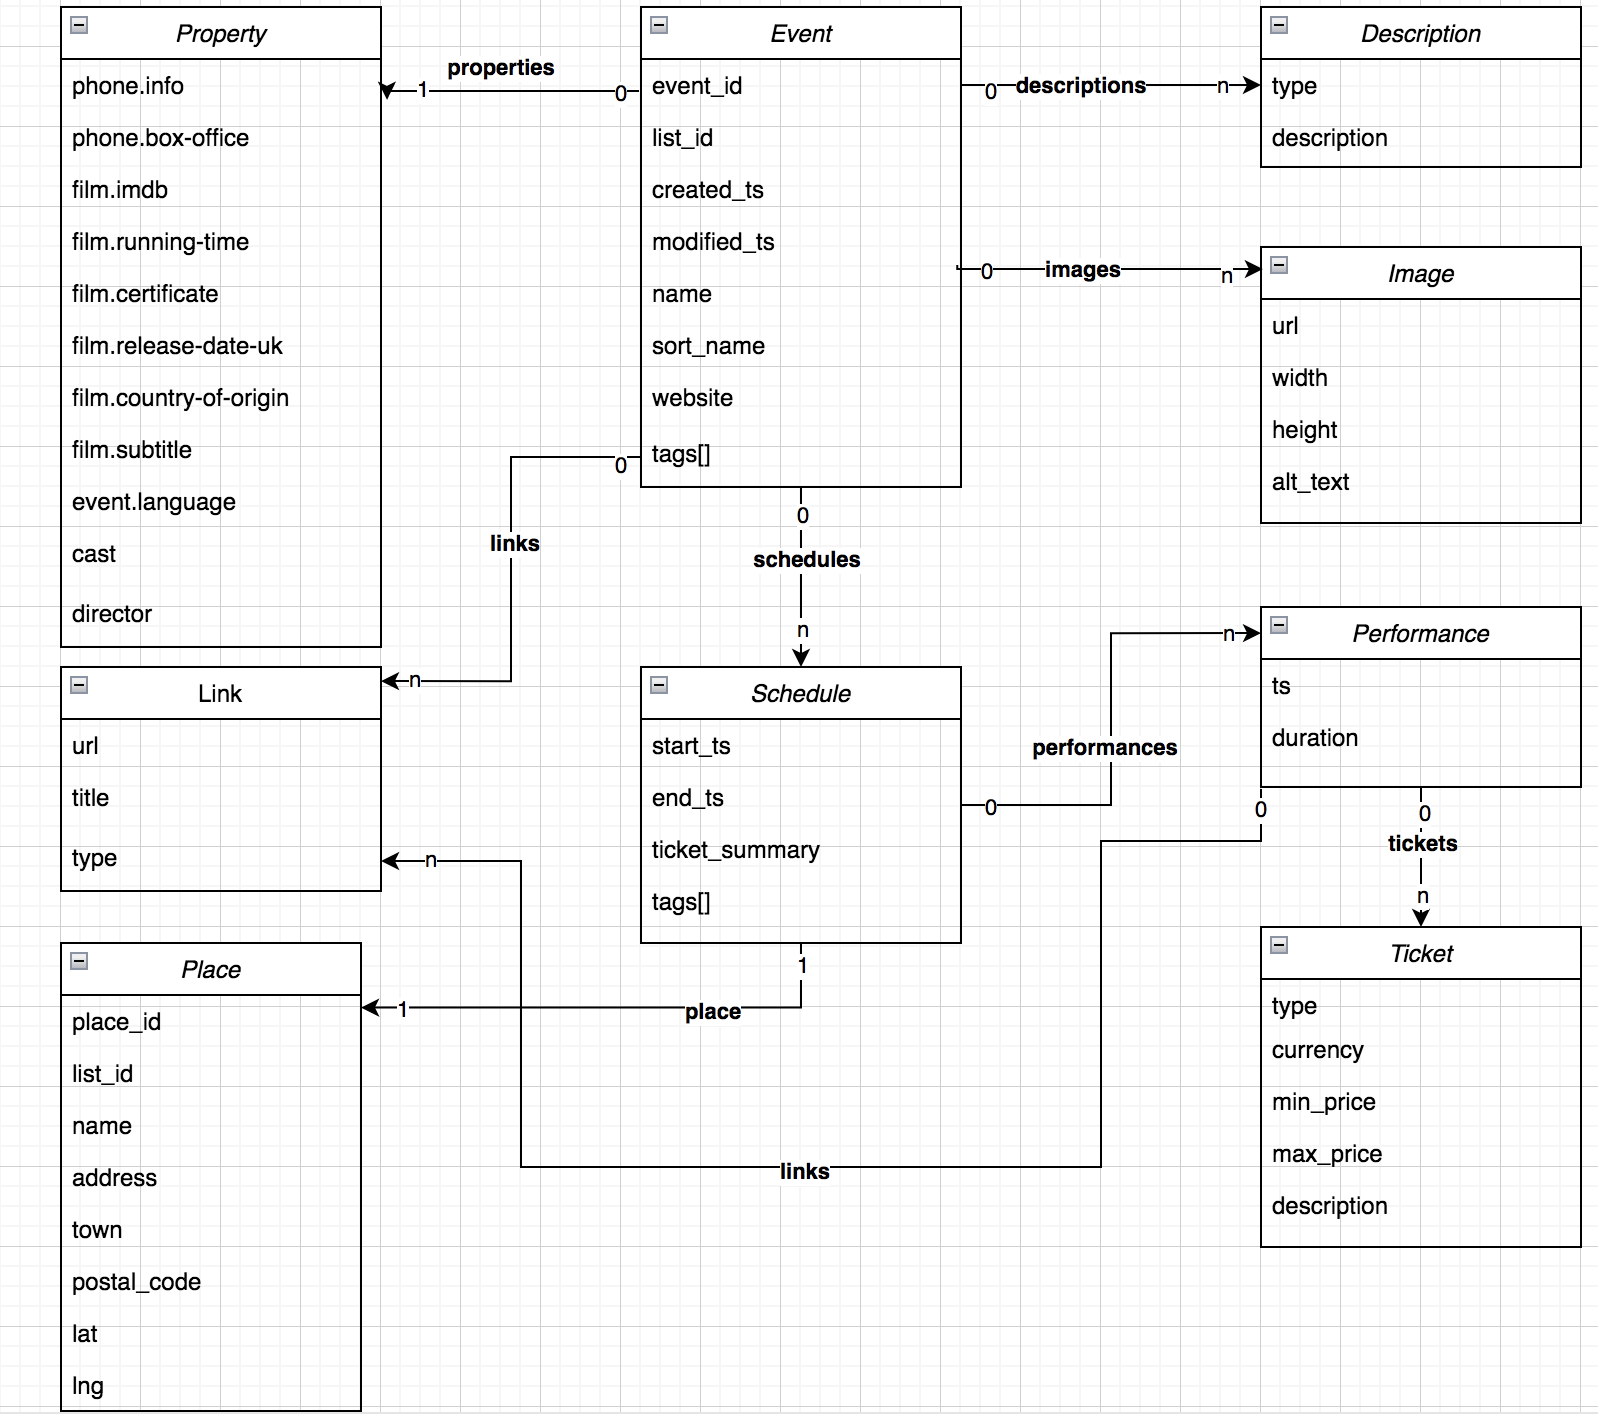

### Download PLACES

The following command only downloads **100 places** and it stores them into 'places.json' file

Note: I have to replace in 'places.json **place.facilities.toilets.disabled** by **place.facilities.toilets_disabled**" --> IF NOT error

In [ ]:
!curl -H "Authorization: Bearer <API_KEY>" -X GET "https://api.list.co.uk/v1/places" > places.json

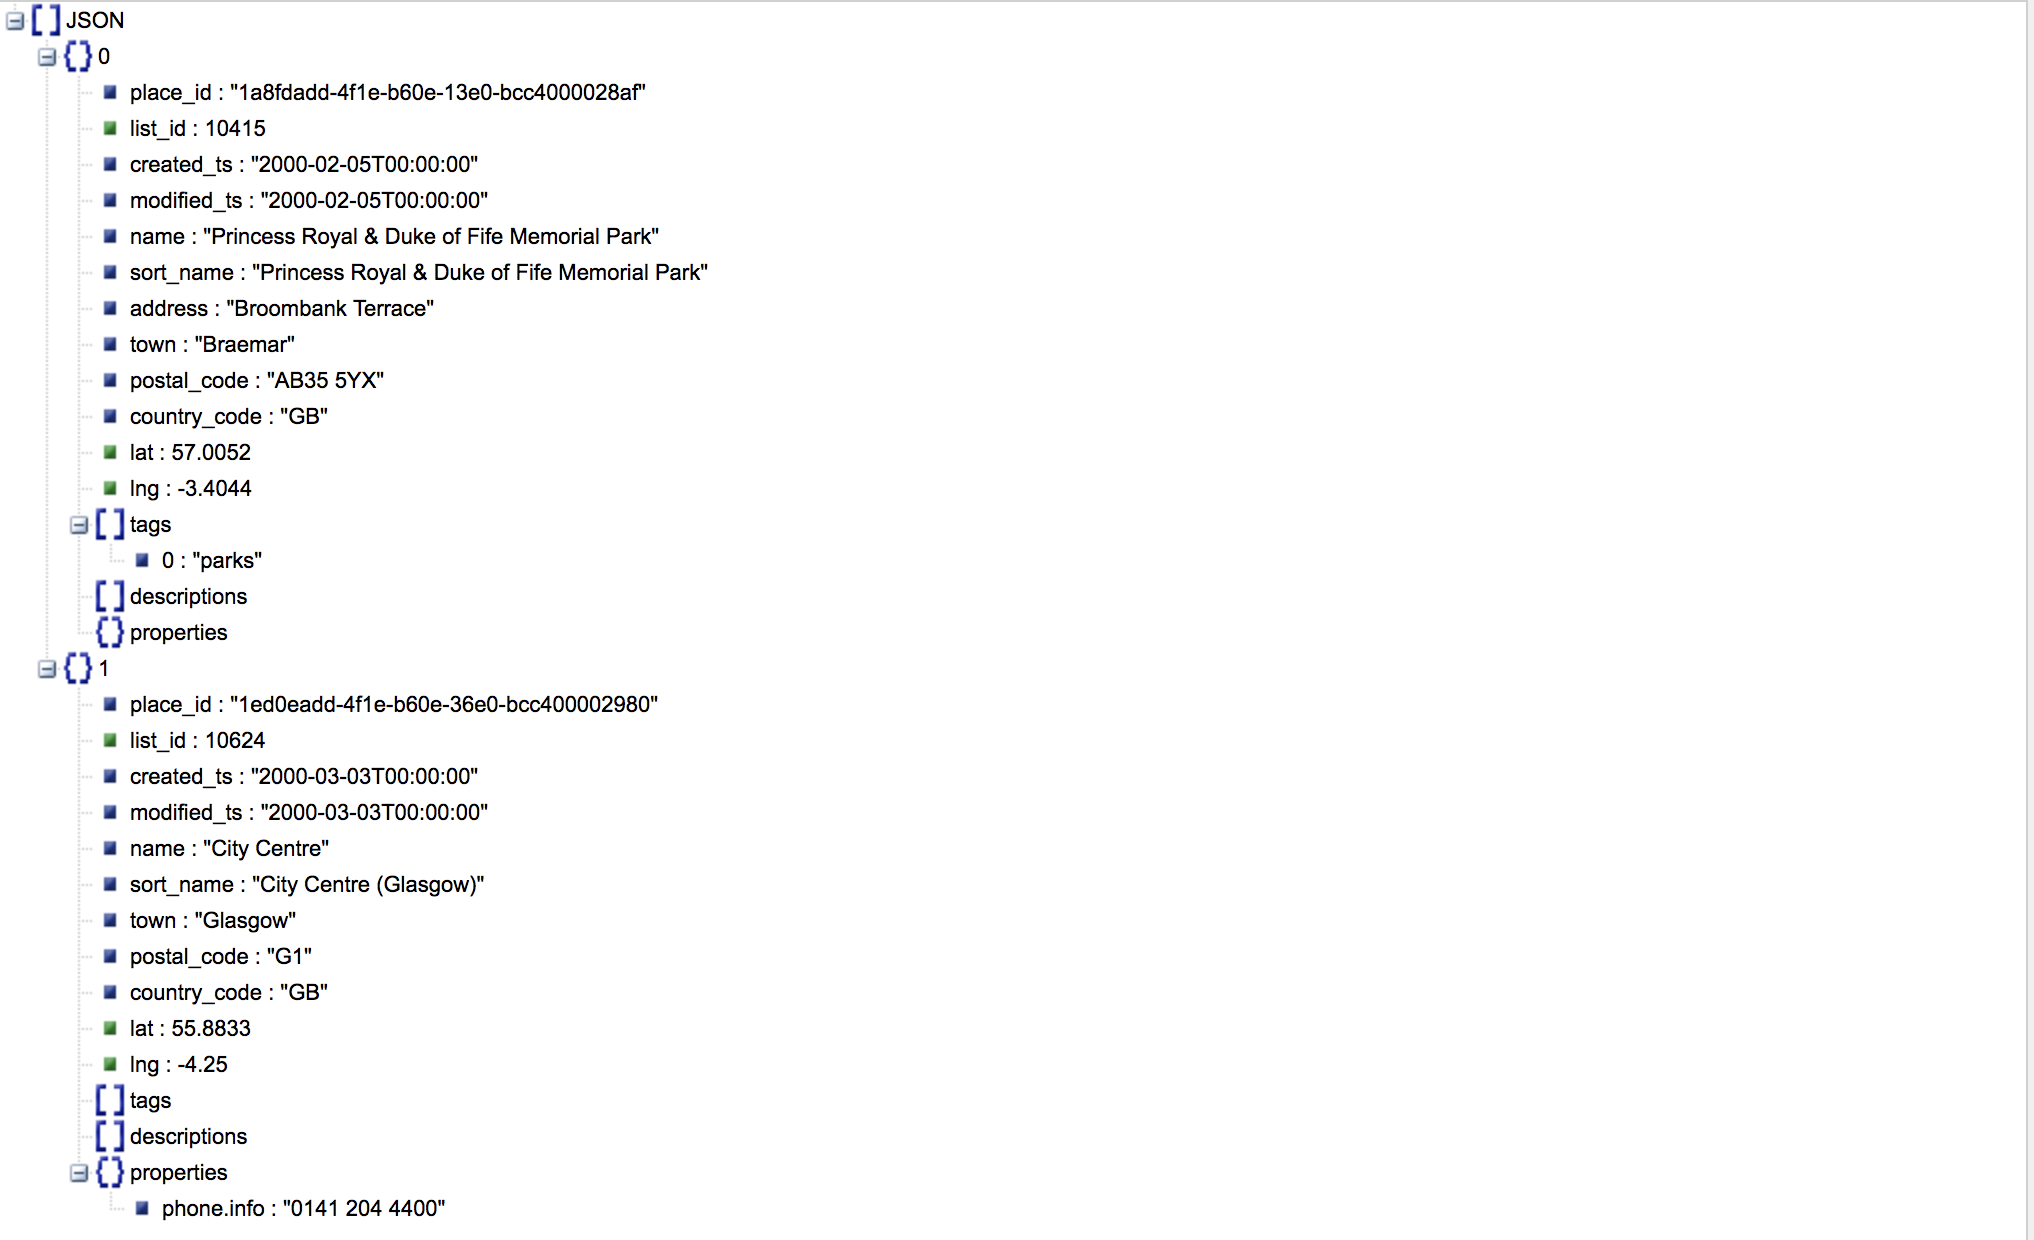

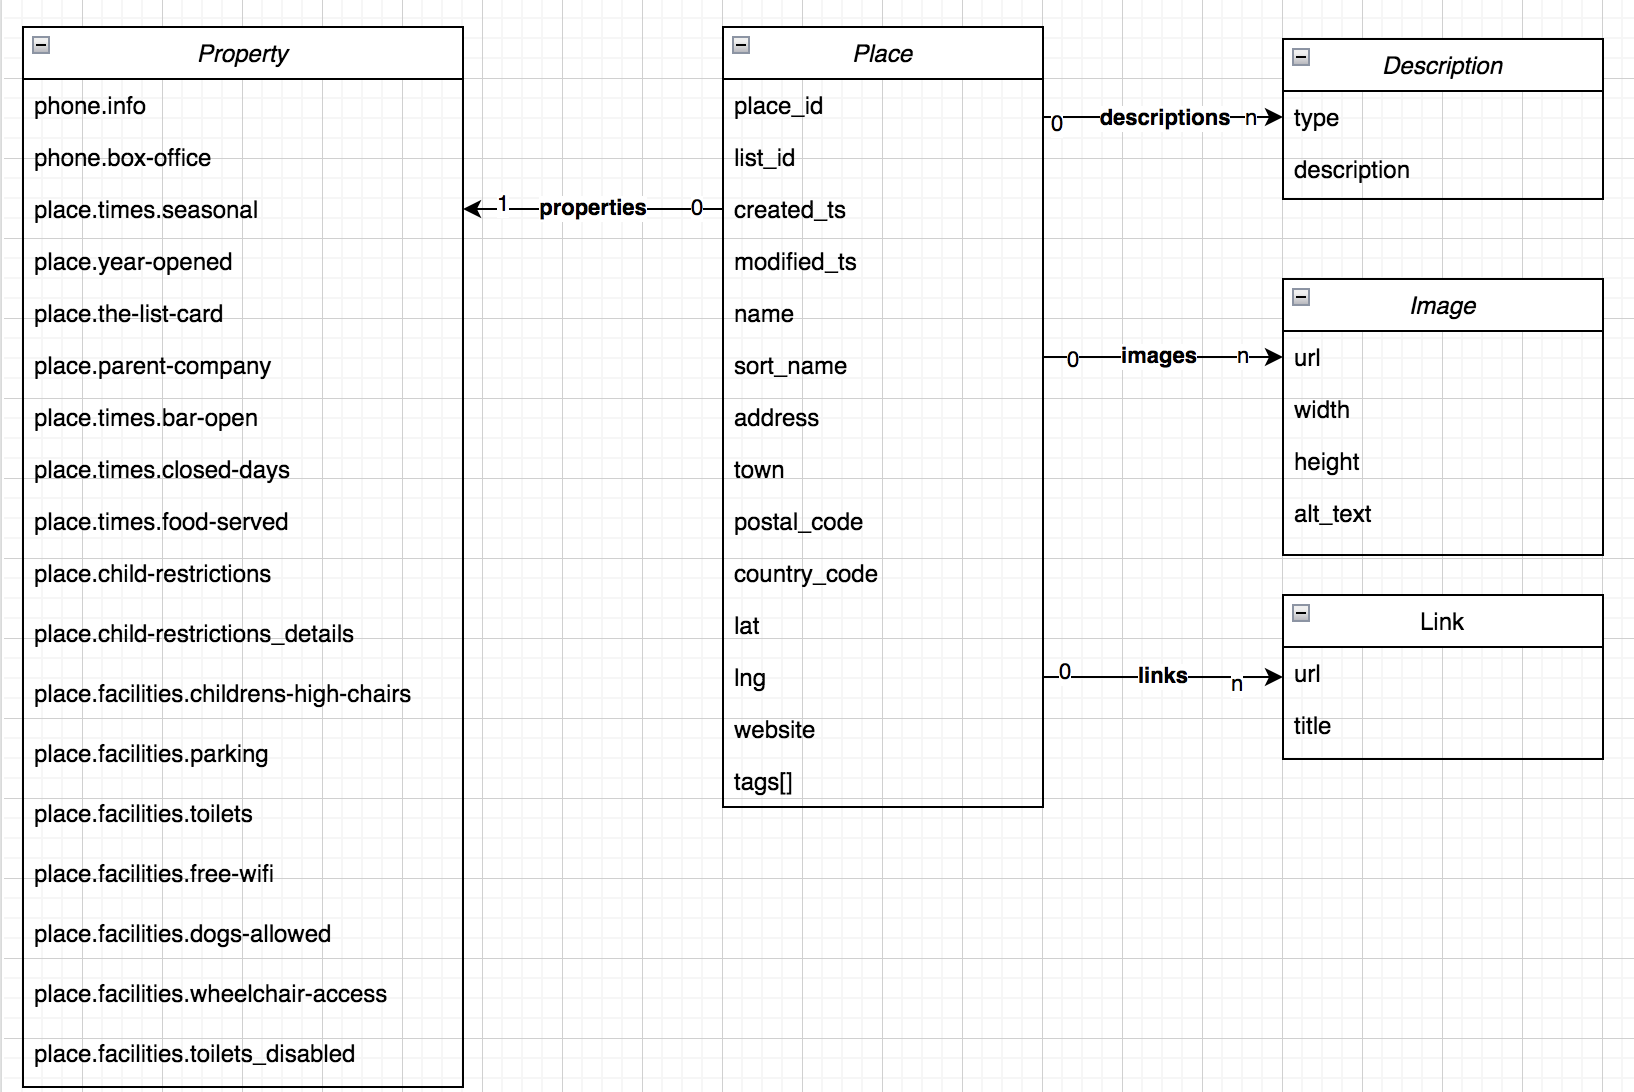

### Start a local ElasticSearch 

Note: better to these commands in a different terminal

- cd < PATH_TO_ELASTICSEARCH >
- /bin/elasticsearch

### Load 'events.json' and 'places.json' into your  elasticsearch

The following script creates two indices (*events* and *places*) and a mapping for each.
Furthermore, it deletes and create these two indices. And it loads the corresponding data ( from 'events.json' and 'places.json') to *events* and *places* indices. 


**mapping**: It describes the properties of an index ~ Columns and Types in a database. 

In [ ]:
!python create_load_indexes_ES.py

### Testing ElasticSearch

We are going to check if **events and places** have been correctly uploaded to our local ElasticSearch. 

In [ ]:
!curl -XGET localhost:9200/places/_search
!curl -XGET localhost:9200/places/_count --> {"count":100,"_shards":{"total":1,"successful":1,"skipped":0,"failed":0}}
    
!curl -XGET localhost:9200/events/_search
!curl -XGET localhost:9200/events/_count --> {"count":20,"_shards":{"total":1,"successful":1,"skipped":0,"failed":0}}

### Other QUERIES TO LIST API

In [ ]:
!curl -H "Authorization: Bearer <API_KEY> " -X GET "https://api.list.co.uk/v1/events?min_date=2020-03-01T00:00:00" > events_after_2020_03_01.json
!curl -H "Authorization: Bearer <API_KEY> " -X GET "https://api.list.co.uk/v1/events/02251f5c-197d-5907-d24b-76d500153353" > event_id_02251f5c-197d-5907-d24b-76d500153353
!curl -H "Authorization: Bearer <API_KEY> " -X GET "https://api.list.co.uk/v1/places?name=Glasgow" > places_glasgow
!curl -H "Authorization: Bearer <API_KEY>" -X GET "https://api.list.co.uk/v1/search?query=glasgow?today" > glasgow_today

#For getting pages
!curl -H "Authorization: Bearer <API_KEY> " -X GET "https://api.list.co.uk/v1/places?page=1"
!curl -H "Authorization: Bearer <API_KEY> " -X GET "https://api.list.co.uk/v1/events?page=1"
